<a href="https://colab.research.google.com/github/NikhilaRaj7337/Machine_Vision/blob/main/Machine_vision_Multiscale_edge_LOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the input file from local computer
path = '/content/drive/MyDrive/sy'
with open(path, 'rb') as file:
    data = file.read()

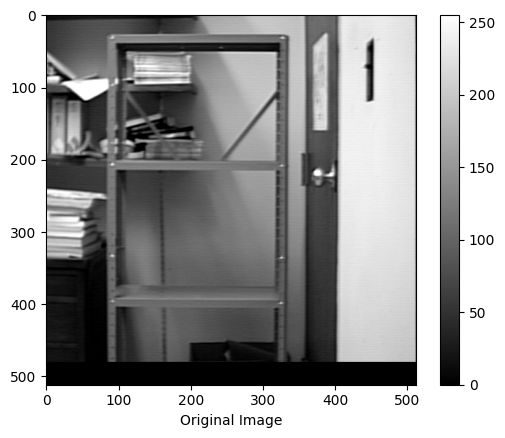

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Read the image from comb.img file and strip the 512-byte header
input_file = '/content/drive/MyDrive/test3.img'
shape = (512, 512)  # matrix size
dtype = np.uint8

#Stripping the 512 header
with open(input_file, 'rb') as bf:
    bf.seek(512)  # stripping the 512-size header in front
    data = np.fromfile(bf, dtype)
    image = data.reshape(shape)  # reshape the image as 2D array of 512 pixels and load the image

# Display Original Image
plt.imshow(image,cmap = 'gray')
plt.xlabel("Original Image")
plt.colorbar()
plt.show()

<ipython-input-21-4940e265a11d>:31: RuntimeWarning: overflow encountered in scalar multiply
  vertical_change = laplacian[i - 1, j] * pixel_value < 0
<ipython-input-21-4940e265a11d>:32: RuntimeWarning: overflow encountered in scalar multiply
  horizontal_change = laplacian[i, j - 1] * pixel_value < 0


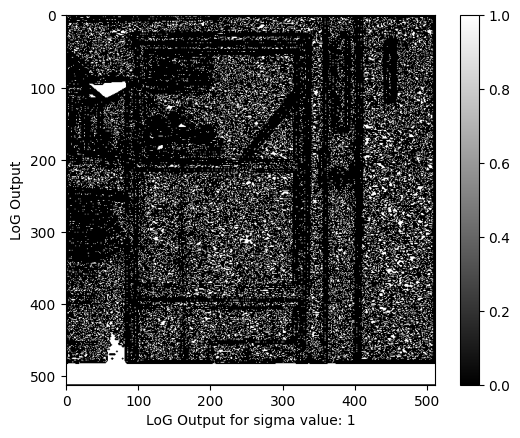

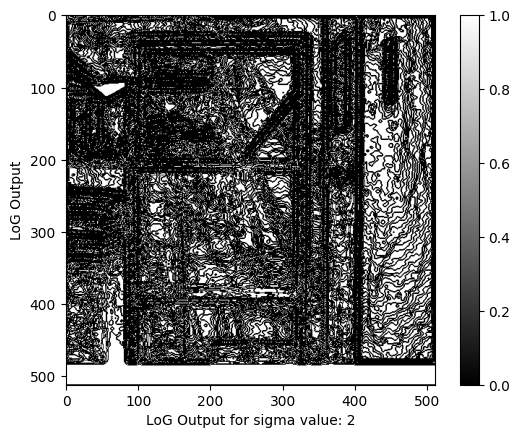

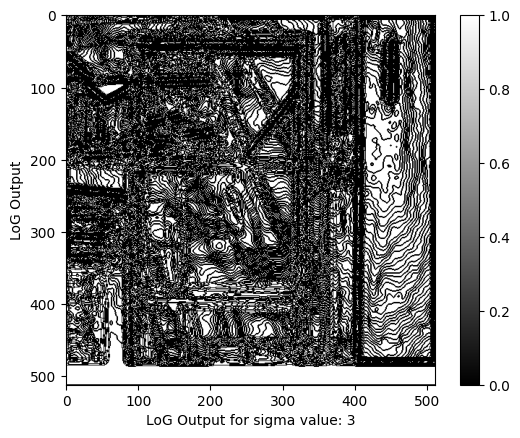

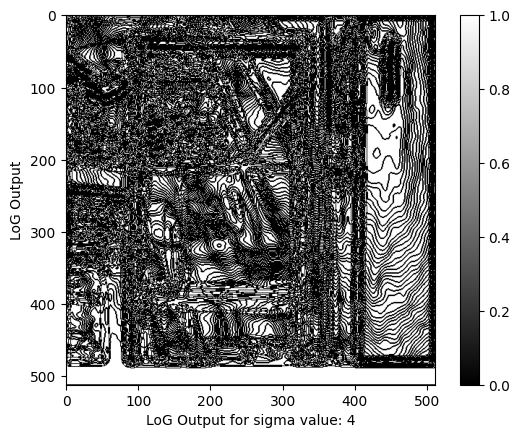

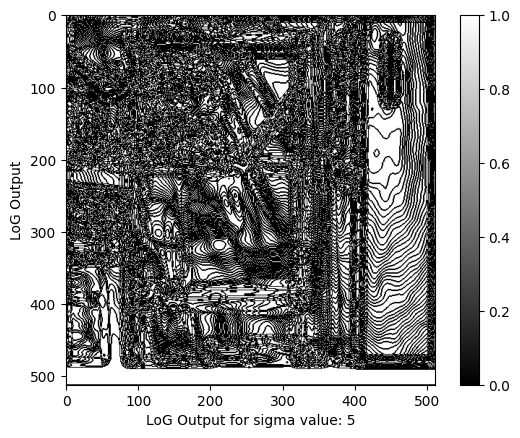

In [ ]:
#Implementing the multiscale LOG edge detector
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# The range of Sigma values
sigma_values = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]

# Define Laplacian kernel for second derivative
laplacian_kernel = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])


# Function to find zero crossings in the Laplacian
def image_zero_crossings(laplacian):
    zero_crossings = np.zeros_like(laplacian, dtype=np.uint8)
    row, col = laplacian.shape
    for i in range(1, row - 1):
        for j in range(1, col - 1):
          pixel_value = laplacian[i, j]

            # Direct zero-value check
          if pixel_value == 0:
              zero_crossings[i, j] = 1
              continue  # No need to check further



          #Check for sign change with neighbors (vertical and horizontal)
          vertical_change = laplacian[i - 1, j] * pixel_value < 0
          horizontal_change = laplacian[i, j - 1] * pixel_value < 0

          if vertical_change or horizontal_change:
             zero_crossings[i, j] = 1

    return zero_crossings


multi_scale_zero_crossings = []  # Store zero-crossing outputs across sigma values


# Calculating the gaussian filter for the range of different sigma values
for sigma in sigma_values:

    size = int(4 * sigma + 1)

    # Initialize the Gaussian filter
    gaussian_filter = np.zeros((size, size))

    # Calculate the Gaussian filter for the current sigma value
    for i in range(size):
        for j in range(size):
          center = size // 2
          gaussian_filter[i, j] = np.exp(-((i - center)**2 + (j - center)**2) / (2 * sigma**2))


    # Normalize the Gaussian kernel to ensure the sum is 1
    gaussian_filter = gaussian_filter / np.sum(gaussian_filter)

    # Smoothing the image using Gaussian filter
    padded_image = np.pad(image, ((center, center), (center, center)), mode='constant')  # Padding the image with zeros
    smooth_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+size, j:j+size]
            smooth_image[i, j] = np.sum(region * gaussian_filter)  # Convolve the region with the Gaussian kernel

    # Compute Laplacian using convolution
    laplacian = convolve(smooth_image, laplacian_kernel)

    # Find zero-crossings in the Laplacian using the function
    zero_crossings = image_zero_crossings(laplacian)

     # Store zero-crossings for multi-scale edge detection
    multi_scale_zero_crossings.append(zero_crossings)


    # Plot the zero-crossings for the current sigma value
    if sigma in [1.0, 2.0, 3.0, 4.0, 5.0]:
        plt.imshow(zero_crossings, cmap='gray')
        plt.xlabel(f'LoG Output for sigma value: {sigma}', fontsize=10)
        plt.ylabel('LoG Output', fontsize=10)
        plt.colorbar()
        plt.show()


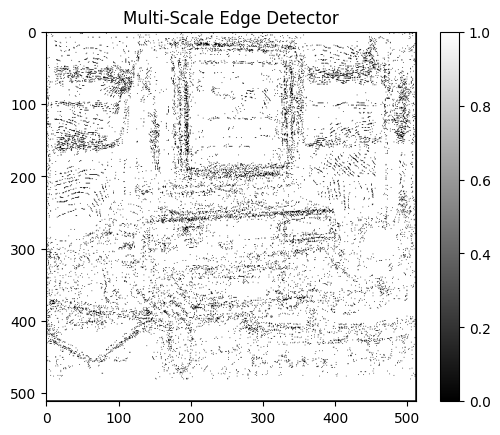

In [ ]:
#Mulitiscale Edge detection Algorithm
# Specify the threshold
threshold = 1

#Initializing multi scale edge detector as an array of zeroes
multi_scale_edge_detector = np.zeros_like(multi_scale_zero_crossings[0], dtype=np.uint8)

# Converting multi_scale_zero_crossings list into a NumPy array
multi_scale_zero_crossings_array = np.array(multi_scale_zero_crossings)

# Sum the zero-crossing
crossing_count = np.sum(multi_scale_zero_crossings_array, axis=0)

# Apply threshold to determine final edges
multi_scale_edge_detector[crossing_count >= threshold] = 1
#multi_scale_edge_detector = (crossing_count >= threshold).astype(np.uint8)

# Display the edge-detected image
plt.imshow(multi_scale_edge_detector, cmap='gray')
plt.title("Multi-Scale Edge Detector")
plt.colorbar()
plt.show()